# Dataset 1 - Non bilanciato

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

def load_file(file_path, to_read, balance=False):
    file = pd.read_csv(file_path, usecols=to_read)

    # Dataset 1 feature name refactoring
    if 'generated' in to_read:
        file['group'] = file['generated'].replace({
            0: 'Human',
            1: 'AI'
        })
    # Dataset 2 feature name refactoring
    else:
        file['group'] = file['source']
        file.loc[file['group'] != 'Human', 'group'] = 'AI'

    # Balance dataset
    if balance:
        # Calculate counts of AI and Human samples
        ai_count = (file['group'] == 'AI').sum()
        human_count = (file['group'] == 'Human').sum()
        print('AI count:', ai_count)
        print('Human count:', human_count)
        # Balance the number of samples
        min_count = min(ai_count, human_count)
        if ai_count > min_count:
            print(f"I'll delete: {ai_count - min_count} from AI rows")
            ai_indices = np.random.choice(file[file['group'] == 'AI'].index, ai_count-min_count, replace=False)
            file = file.drop(ai_indices)
        elif human_count > min_count:
            print(f"I'll delete: {human_count - min_count} from Human rows")
            human_indices = np.random.choice(file[file['group'] == 'Human'].index, human_count-min_count, replace=False)
            file = file.drop(human_indices)

    return file

filepath = "/content/drive/MyDrive/CSV/AI_Human.csv"
columns_to_read = ["text", "generated"]
file = load_file(filepath, columns_to_read)

print(file.head())

KeyboardInterrupt: 

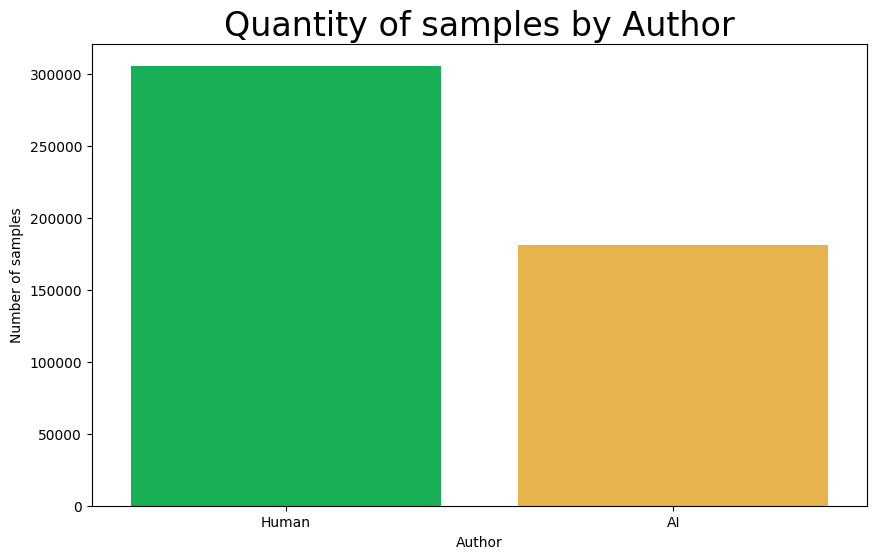

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def countSamples(file, column="group"):
    if column not in file.columns:
      print("Column not in file!")
      return

    # Set plot size
    plt.figure(figsize=(10, 6))

    # Get unique class names and colors
    classNames = file[column].unique()
    colorMapping = dict()

    # Assign #ffbb33 color to non-'Human' values
    for label in classNames:
        if label != 'Human':
            colorMapping[label] = '#ffbb33'
        else:
            colorMapping[label] = '#00c851'

    # Create list of colors based on classNames values
    colors = [colorMapping[value] for value in classNames]

    sns.countplot(x=column, data=file, palette=colors, hue=column, legend=False)

    # Add title and lables
    plt.title('Quantity of samples by Author', fontsize=24)
    plt.ylabel("Number of samples")
    plt.xlabel('Author')
    plt.xticks(range(len(classNames)), classNames)


    if column != "group":
        # Rotate labels on the x axys
        plt.xticks(rotation=90)

        # Add margin to the bottom
        plt.subplots_adjust(bottom=0.4)

        # Make "Human" lable red
        ax = plt.gca()
        labels = ax.get_xticklabels()
        for i, label in enumerate(labels):
            if label.get_text() == 'Human':
                labels[i].set_color('red')

    plt.show()


countSamples(file)

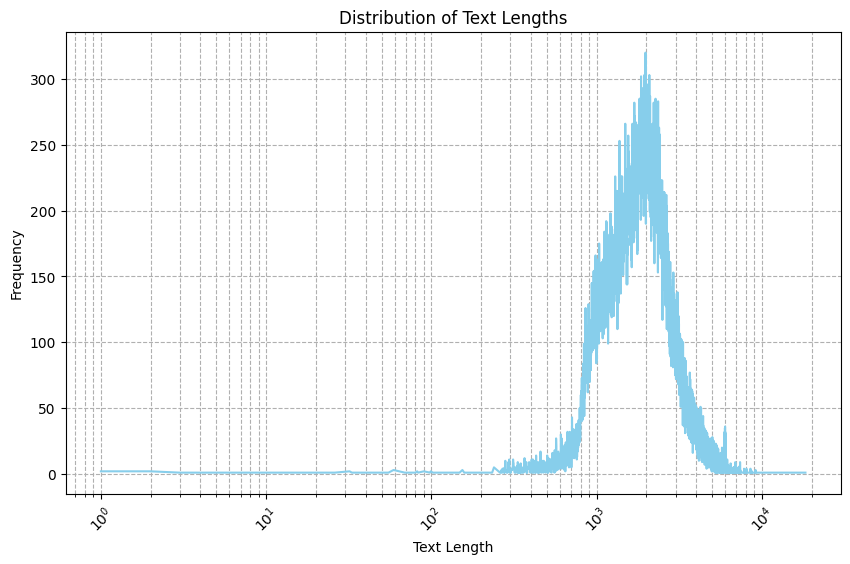

In [ ]:
def textLength(file):
    # Calculates text lengths and transform them into a list
    textLen = file['text'].apply(len).tolist()

    # Calculates the frequency of each text length
    freqDict = {}
    for length in textLen:
        freqDict[length] = freqDict.get(length, 0) + 1

    # Sort text lengths and their frequencies
    sortedLengths = sorted(freqDict.keys())
    freq = [freqDict[length] for length in sortedLengths]

    # Create line graph of text length distribution
    plt.figure(figsize=(10, 6))
    plt.plot(sortedLengths, freq, color='skyblue')
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Logarithmic scale on the x-axis for better visualisation
    plt.grid(True, which="both", ls="--")  # Adds a grid on both x and y

    plt.xticks(rotation=45)
    plt.show()

textLength(file)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

def count100Words(file, num, sampleType=None):

    if sampleType is not None:
      if sampleType == "AI":
        title = "AI"
        text = file.loc[file['group'] == 'AI']
        color = '#ffbb33'
      elif sampleType == "Human":
        title = "Human"
        text = file.loc[file['group'] == 'Human']
        color = '#00c851'
    else:
      color = '#1d75b2'
      title = "Dataset"
      text = file.sample(n=num, replace=False)

    # Concatenates all sentences into a single string
    all_text = ' '.join(text['text'][:num])

    # Tokenisation of words
    tokens = word_tokenize(all_text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Calculate word frequencies
    word_freq = Counter(filtered_tokens)

    # Extract words and their frequencies
    words = list(word_freq.keys())  # Estrai le parole
    frequencies = list(word_freq.values())  # Estrai le frequenze

    # Sort words according to frequencies
    words, frequencies = zip(*sorted(zip(words, frequencies), key=lambda x: x[1], reverse=True))

    # Select the 100 most common words
    top_words = list(zip(words[:100], frequencies[:100]))

    # Extract words and their frequencies
    words, frequencies = zip(*top_words)

    # Create the graph
    plt.figure(figsize=(15, 8))
    plt.bar(words, frequencies, color=color)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.title(f'Top 100 most common words [{title}]')
    plt.xticks(rotation=90)  # Rotate labels on the x-axis for better readability
    plt.show()

n_rows = int(len(file)*0.6)
count100Words(file, n_rows)

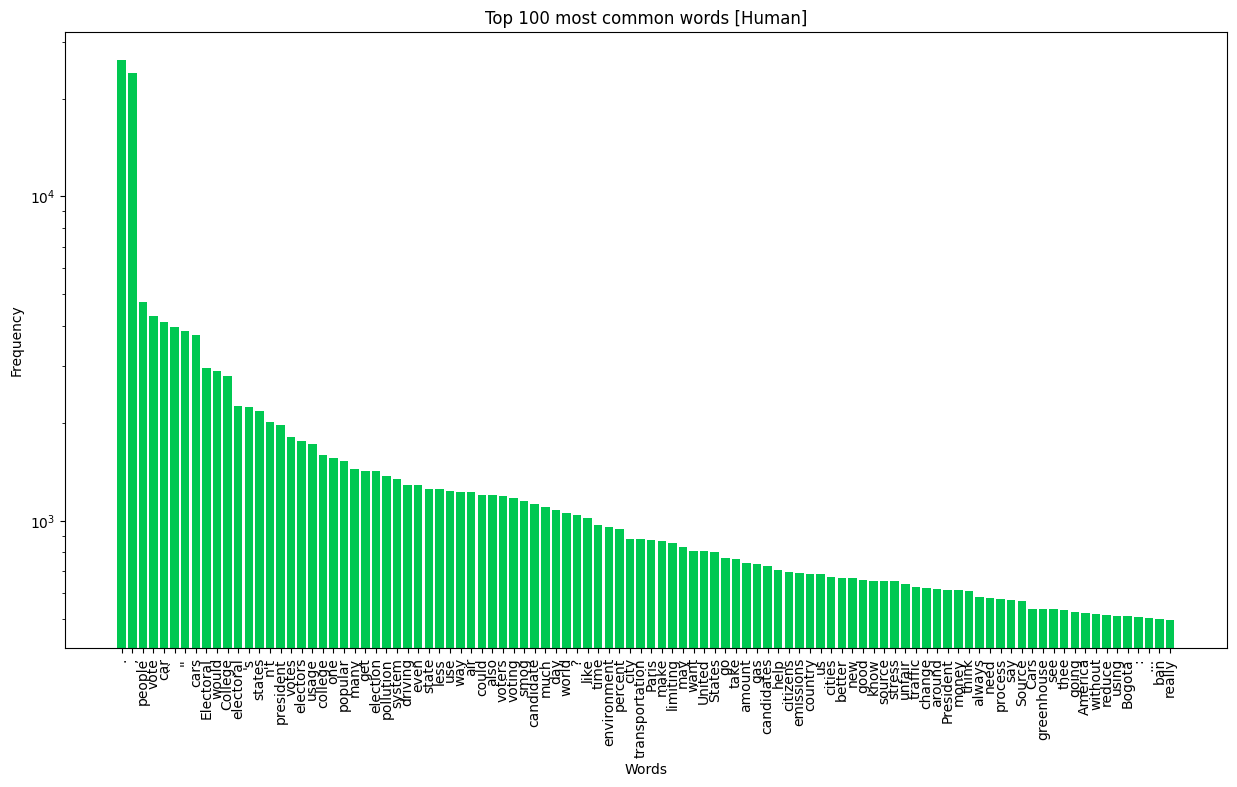

In [ ]:
count100Words(file, n_rows, "Human")

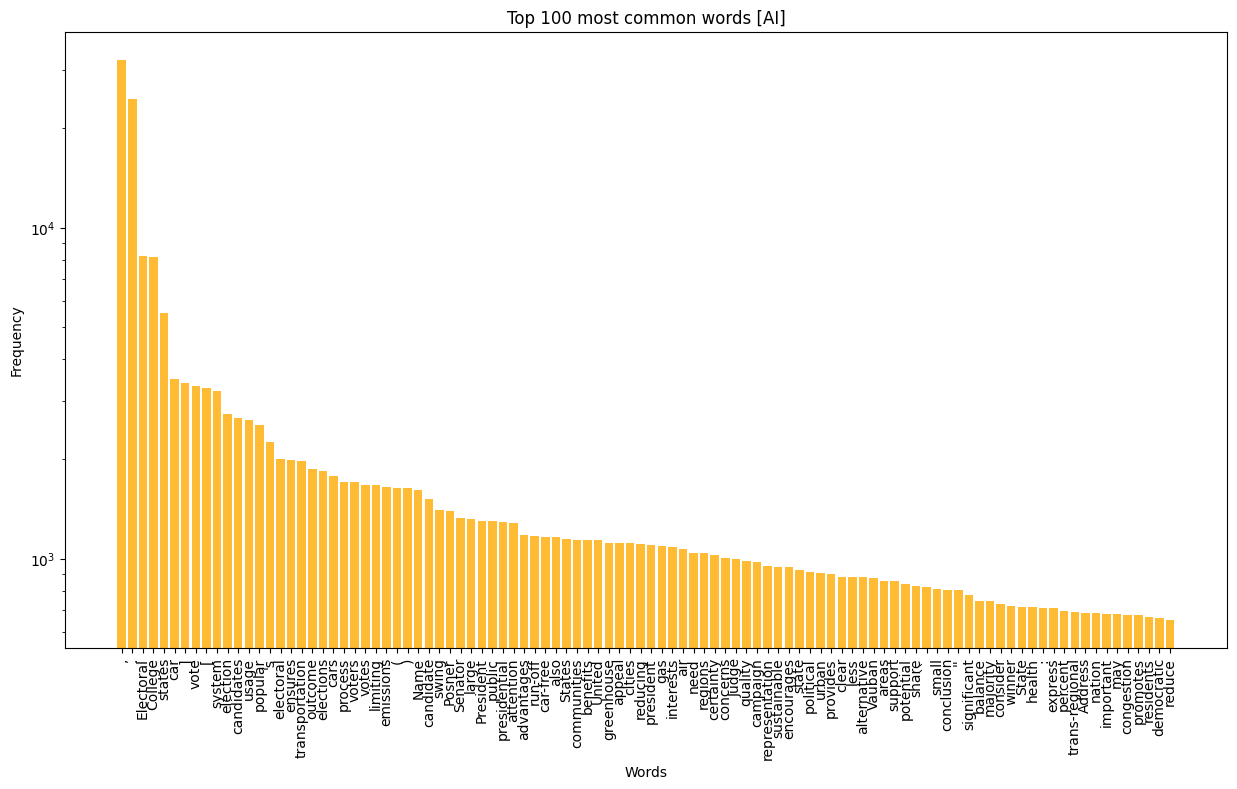

In [ ]:
count100Words(file, n_rows, "AI")

# Dataset 2 - Non bilanciato




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

def load_file(file_path, to_read, balance=False):
    file = pd.read_csv(file_path, usecols=to_read)

    # Dataset 1 feature name refactoring
    if 'generated' in to_read:
        file['group'] = file['generated'].replace({
            0: 'Human',
            1: 'AI'
        })
    # Dataset 2 feature name refactoring
    else:
        file['group'] = file['source']
        file.loc[file['group'] != 'Human', 'group'] = 'AI'

    # Balance dataset
    if balance:
        # Calculate counts of AI and Human samples
        ai_count = (file['group'] == 'AI').sum()
        human_count = (file['group'] == 'Human').sum()
        print('AI count:', ai_count)
        print('Human count:', human_count)
        # Balance the number of samples
        min_count = min(ai_count, human_count)
        if ai_count > min_count:
            print(f"I'll delete: {ai_count - min_count} from AI rows")
            ai_indices = np.random.choice(file[file['group'] == 'AI'].index, ai_count-min_count, replace=False)
            file = file.drop(ai_indices)
        elif human_count > min_count:
            print(f"I'll delete: {human_count - min_count} from Human rows")
            human_indices = np.random.choice(file[file['group'] == 'Human'].index, human_count-min_count, replace=False)
            file = file.drop(human_indices)

    return file

filepath = "/content/drive/MyDrive/CSV/data.csv"
columns_to_read = ["text", "source"]
file = load_file(filepath, columns_to_read)

print(file.head())

                                                text    source group
0  Federal law supersedes state law, and cannabis...  Bloom-7B    AI
1  Miles feels restless after working all day. He...  Bloom-7B    AI
2  So first of I am danish. That means that I fol...  Bloom-7B    AI
3  In this paper we present a novel rule-based ap...  Bloom-7B    AI
4  Most social progressives, love democracy, and ...  Bloom-7B    AI


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def countSamples(file, column="group"):
    if column not in file.columns:
      print("Column not in file!")
      return

    # Set plot size
    plt.figure(figsize=(10, 6))

    # Get unique class names and colors
    classNames = file[column].unique()
    colorMapping = dict()

    # Assign #ffbb33 color to non-'Human' values
    for label in classNames:
        if label != 'Human':
            colorMapping[label] = '#ffbb33'
        else:
            colorMapping[label] = '#00c851'

    # Create list of colors based on classNames values
    colors = [colorMapping[value] for value in classNames]

    sns.countplot(x=column, data=file, palette=colors, hue=column, legend=False)

    # Add title and lables
    plt.title('Quantity of samples by Author', fontsize=24)
    plt.ylabel("Number of samples")
    plt.xlabel('Author')
    plt.xticks(range(len(classNames)), classNames)


    if column != "group":
        # Rotate labels on the x axys
        plt.xticks(rotation=90)

        # Add margin to the bottom
        plt.subplots_adjust(bottom=0.4)

        # Make "Human" lable red
        ax = plt.gca()
        labels = ax.get_xticklabels()
        for i, label in enumerate(labels):
            if label.get_text() == 'Human':
                labels[i].set_color('red')

    plt.show()


countSamples(file, 'source')

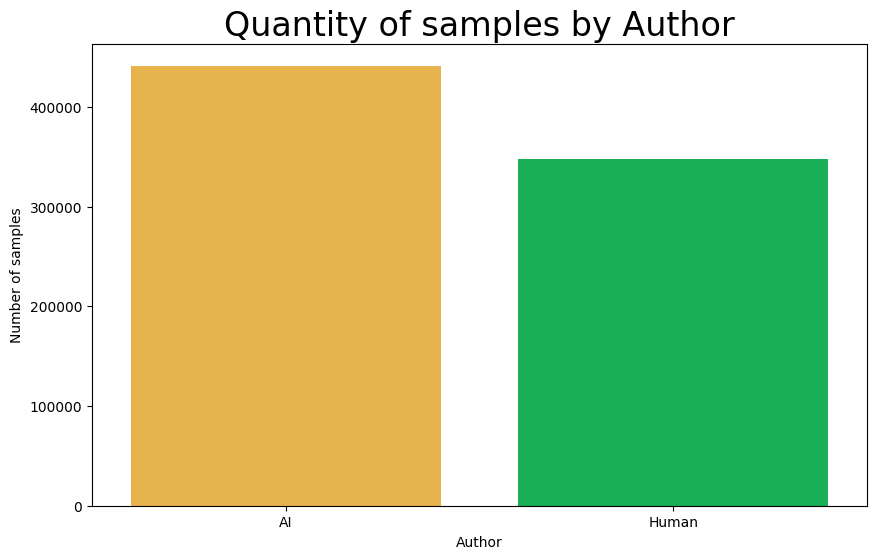

In [ ]:
countSamples(file)

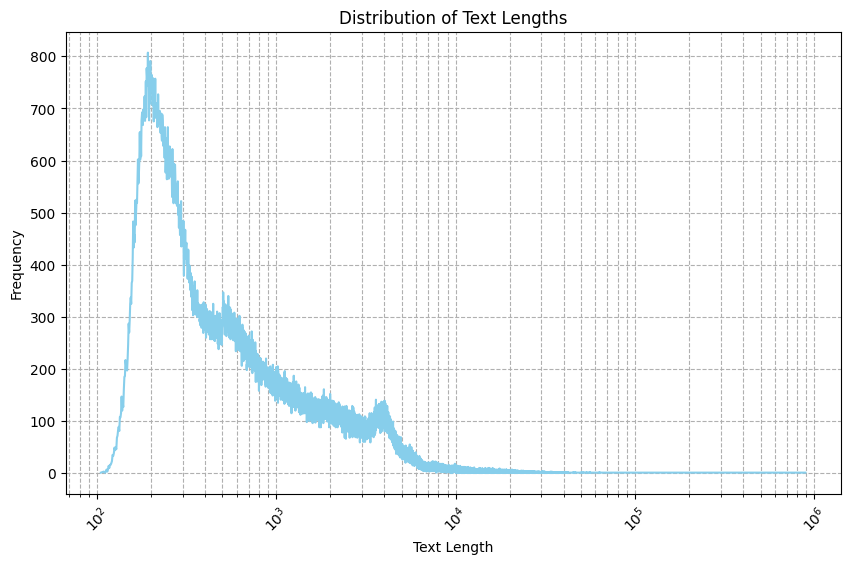

In [ ]:
def textLength(file):
    # Calcola le lunghezze dei testi e trasformale in una lista
    textLen = file['text'].apply(len).tolist()

    # Calcola la frequenza di ogni lunghezza del testo
    freqDict = {}
    for length in textLen:
        freqDict[length] = freqDict.get(length, 0) + 1

    # Ordina le lunghezze dei testi e le relative frequenze
    sortedLengths = sorted(freqDict.keys())
    freq = [freqDict[length] for length in sortedLengths]

    # Crea il grafico a linea della distribuzione delle lunghezze dei testi
    plt.figure(figsize=(10, 6))
    plt.plot(sortedLengths, freq, color='skyblue')
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Scala logaritmica sull'asse x per una migliore visualizzazione
    plt.grid(True, which="both", ls="--")  # Aggiunge una griglia sia sulle x che sulle y

    plt.xticks(rotation=45)
    plt.show()

textLength(file)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

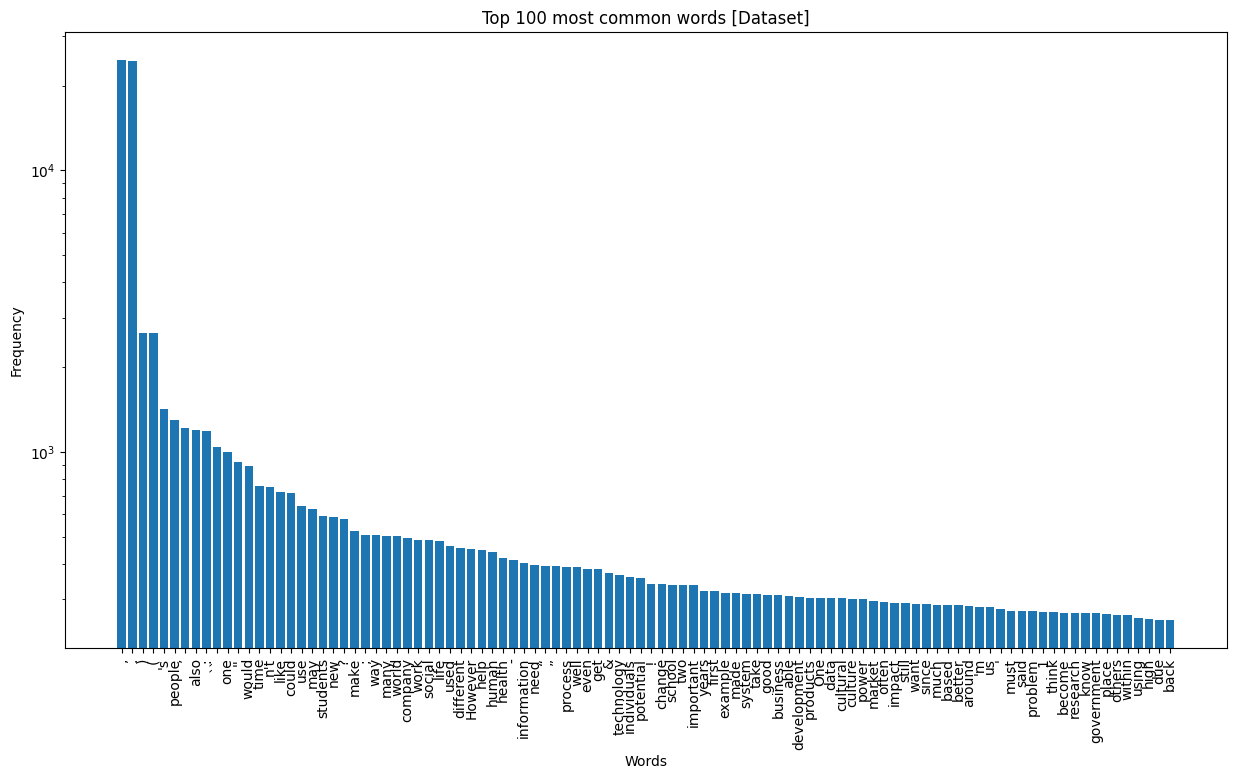

In [ ]:
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

def count100Words(file, num, sampleType=None):

    if sampleType is not None:
      if sampleType == "AI":
        title = "AI"
        text = file.loc[file['group'] == 'AI']
        color = '#ffbb33'
      elif sampleType == "Human":
        title = "Human"
        text = file.loc[file['group'] == 'Human']
        color = '#00c851'
    else:
      color = '#1d75b2'
      title = "Dataset"
      text = file.sample(n=num, replace=False)

    # Concatena tutte le frasi in un'unica stringa
    all_text = ' '.join(text['text'][:num])

    # Tokenizzazione delle parole
    tokens = word_tokenize(all_text)

    # Rimozione delle stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Calcola le frequenze delle parole
    word_freq = Counter(filtered_tokens)

    # Estrai le parole e le relative frequenze
    words = list(word_freq.keys())  # Estrai le parole
    frequencies = list(word_freq.values())  # Estrai le frequenze

    # Ordina le parole in base alle frequenze
    words, frequencies = zip(*sorted(zip(words, frequencies), key=lambda x: x[1], reverse=True))

    # Seleziona le 100 parole più comuni
    top_words = list(zip(words[:100], frequencies[:100]))

    # Estrai le parole e le relative frequenze
    words, frequencies = zip(*top_words)

    # Crea il grafico
    plt.figure(figsize=(15, 8))
    plt.bar(words, frequencies, color=color)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.title(f'Top 100 most common words [{title}]')
    plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.show()

n_rows = 1000
count100Words(file, n_rows)

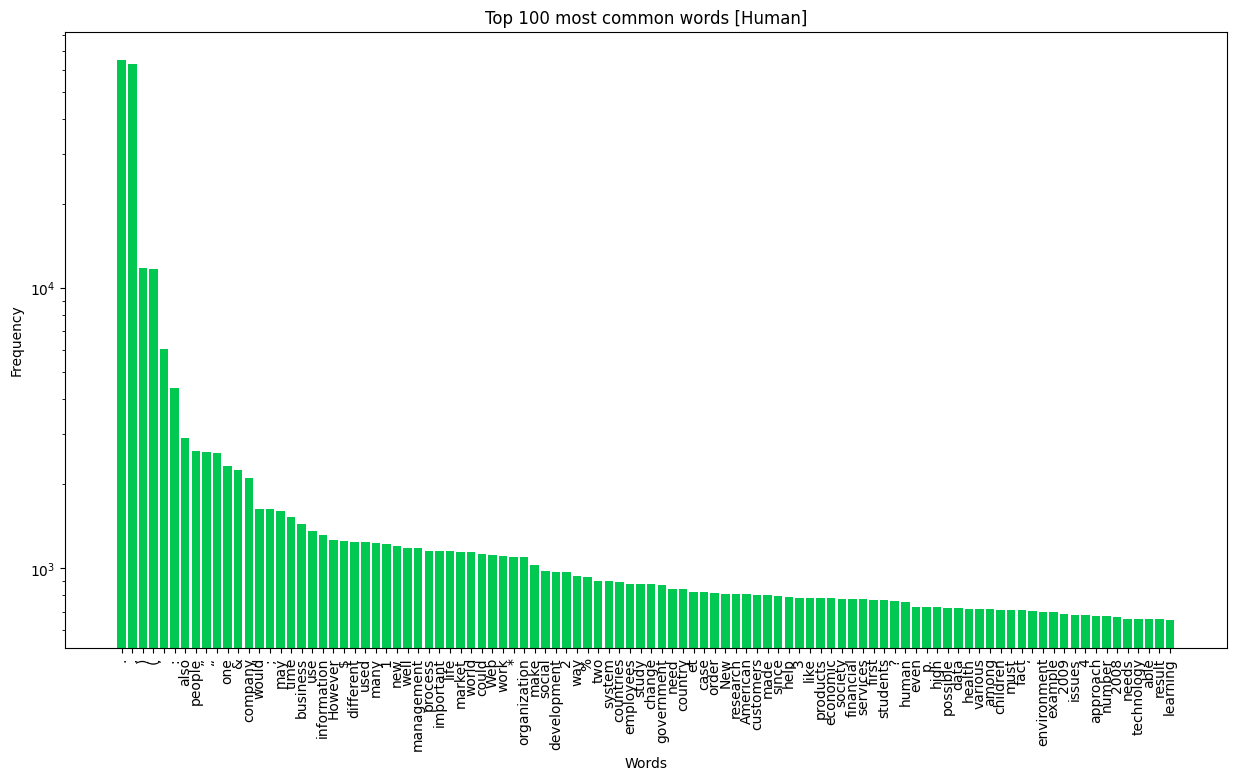

In [ ]:
count100Words(file, n_rows, "Human")

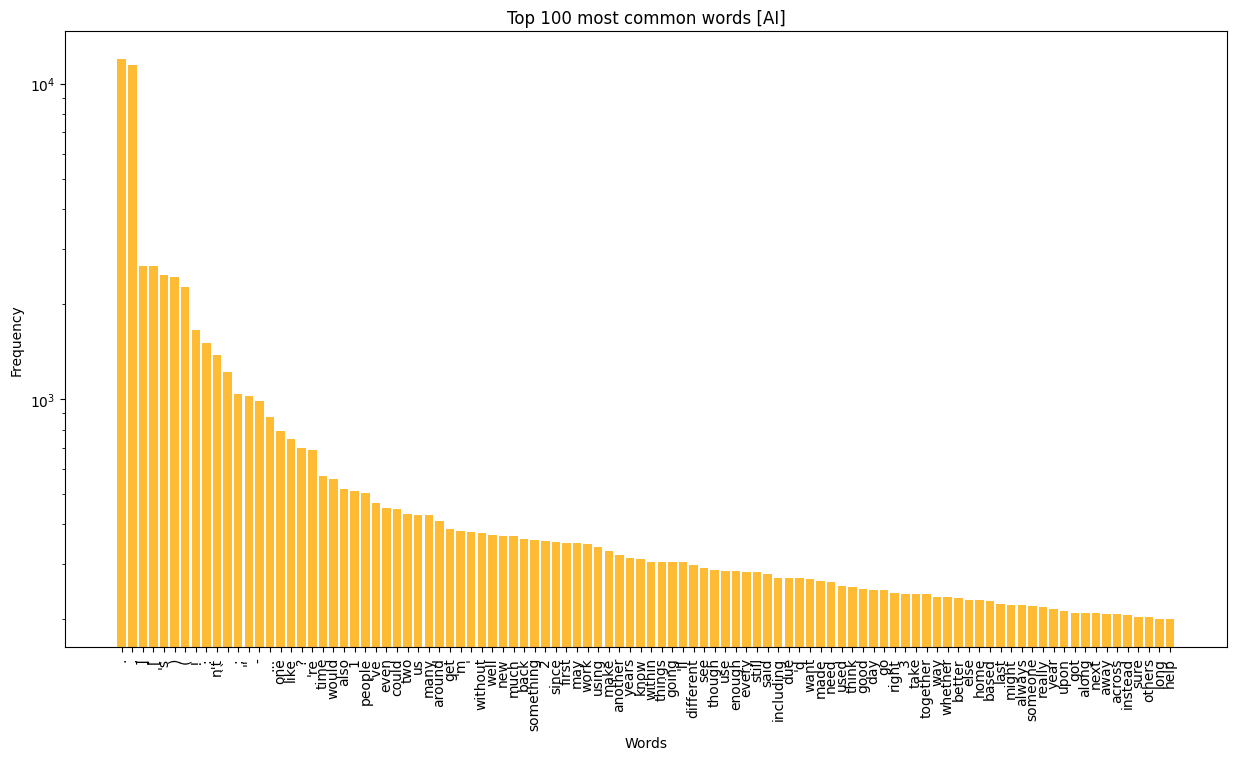

In [ ]:
count100Words(file, n_rows, "AI")

# Dataset Balancing

In [ ]:
filepath = "/content/drive/MyDrive/CSV/AI_Human.csv" # Dataset 1
columns_to_read = ["text", "generated"]
file = load_file(filepath, columns_to_read,  balance=True)

AI count: 181438
Human count: 305797
I'll delete: 124359 from Human rows


In [ ]:
filepath = "/content/drive/MyDrive/CSV/data.csv" # Dataset 2
columns_to_read = ["text", "source"]
file = load_file(filepath, columns_to_read, balance=True)

AI count: 441230
Human count: 347692
I'll delete: 93538 from AI rows


# Pipeline

In [ ]:
x = file['text']
y = file['group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier


tfidf_vectorizer = TfidfVectorizer(stop_words='english')

pipelines = [
    Pipeline([('tfidf', tfidf_vectorizer), ('clf', MultinomialNB())]),
    Pipeline([('tfidf', tfidf_vectorizer), ('clf', ComplementNB())]),
    Pipeline([('tfidf', tfidf_vectorizer), ('clf', DecisionTreeClassifier(max_depth=5))]),
]

In [ ]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Function '{func.__name__}' executed in {elapsed_time:.6f} seconds")
        return result

    return wrapper

@timer
def run_pipeline(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred


y_preds = list()
for p in pipelines:
  print(p)
  y_preds.append(run_pipeline(p, x_train, y_train, x_test))

print(y_preds)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])
Function 'run_pipeline' executed in 165.009657 seconds
Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', ComplementNB())])
Function 'run_pipeline' executed in 159.846200 seconds
Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', DecisionTreeClassifier(max_depth=5))])
Function 'run_pipeline' executed in 231.255515 seconds
[array(['Human', 'Human', 'AI', ..., 'Human', 'Human', 'Human'],
      dtype='<U5'), array(['Human', 'Human', 'AI', ..., 'Human', 'Human', 'Human'],
      dtype='<U5'), array(['Human', 'Human', 'Human', ..., 'AI', 'Human', 'Human'],
      dtype=object)]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracies = []
reports = []

for i, y_pred in enumerate(y_preds):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracies.append(accuracy)
    reports.append(report)


In [ ]:
model_names = ["Multinomial Naive Bayes", "Complement Naive Bayes", "Decision Tree Classifier"]
for i in range(len(accuracies)):
    print(f"{model_names[i]}:")
    print(f"Accuracy: {accuracies[i] * 100:.2f}%")
    print("Classification Report:")
    print(reports[i])
    print('\n----------------------------------\n')

NameError: name 'accuracies' is not defined

In [ ]:
sentence = ["Exploring the tranquil depths of the ocean, a curious sea turtle gracefully glides through the vibrant coral reef, its iridescent shell shimmering under the dappled sunlight filtering through the water's surface. As it gracefully navigates the underwater world, the turtle encounters a playful school of colorful fish darting among the coral branches, their scales catching the light in a mesmerizing display. Above, a squadron of pelicans soars gracefully, their wings casting fleeting shadows on the ocean floor below. Amidst the rhythmic swaying of the seaweed and the gentle sway of the currents, the turtle pauses, momentarily entranced by the timeless beauty that surrounds it. In this serene underwater sanctuary, life flourishes in all its intricate and delicate forms, a reminder of the wonders that lie beneath the waves."]


for i, p in enumerate(pipelines):
  transformed_frase_mnb = p.named_steps['tfidf'].transform(sentence)
  predicted_class_mnb = p.named_steps['clf'].predict(transformed_frase_mnb)
  print(f"{model_names[i]}:")
  print(f"Predict : {predicted_class_mnb}")

Multinomial Naive Bayes:
Predict : ['Human']


# Grafici Conclusivi

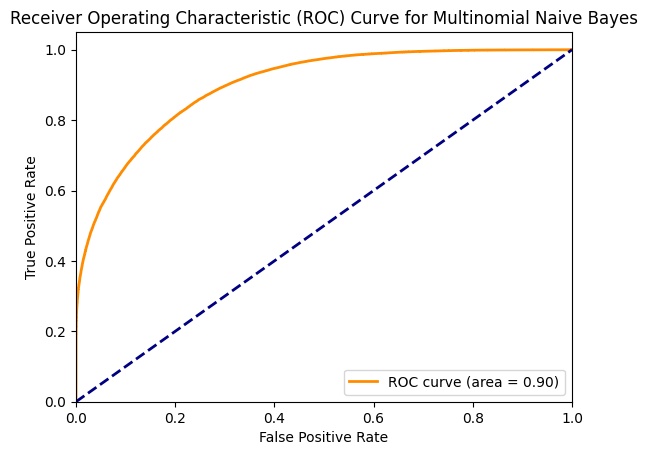

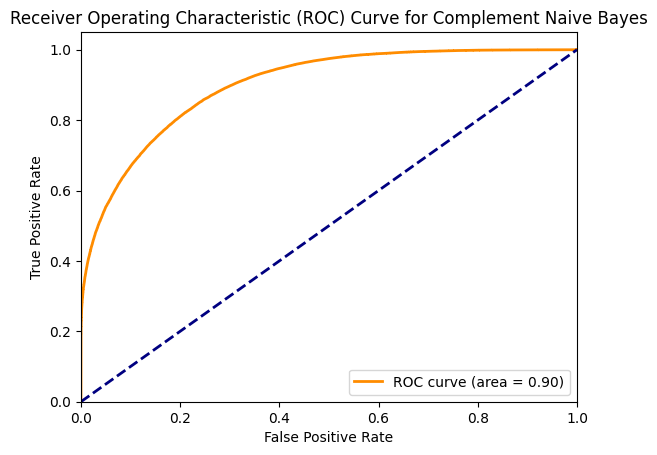

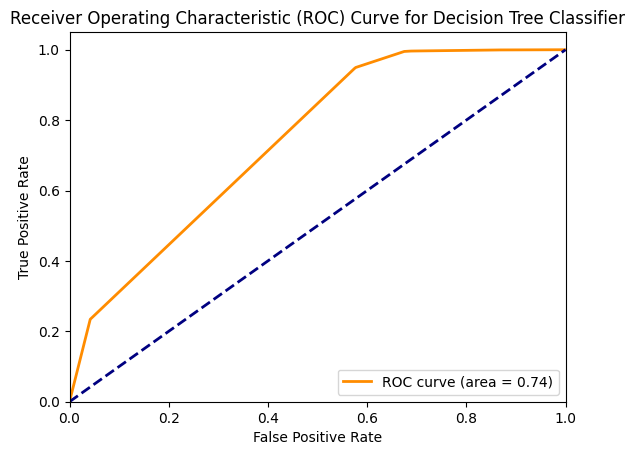

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for i, p in enumerate(pipelines):
  probs = p.predict_proba(x_test)[:, 0]
  y_test_binary = (y_test == 'AI').astype(int)

  fpr, tpr, _ = roc_curve(y_test_binary, probs)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_names[i]}')
  plt.legend(loc="lower right")
  plt.show()
  print()

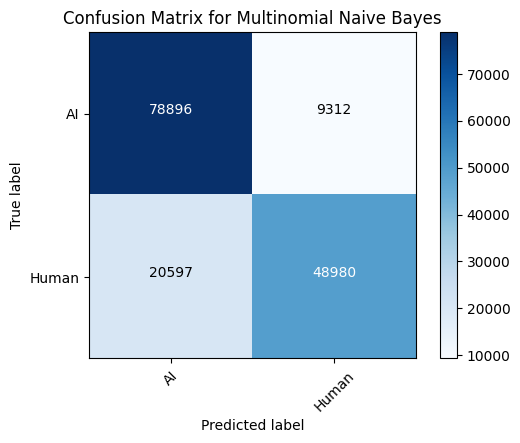

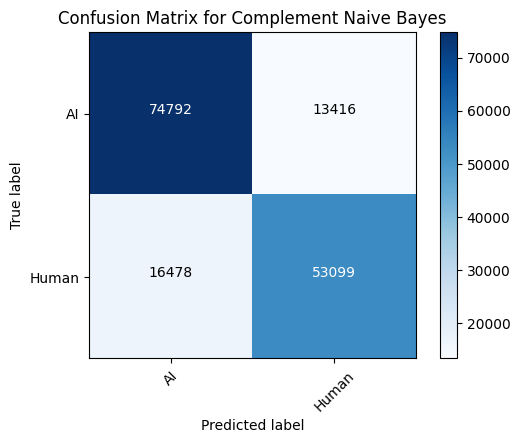

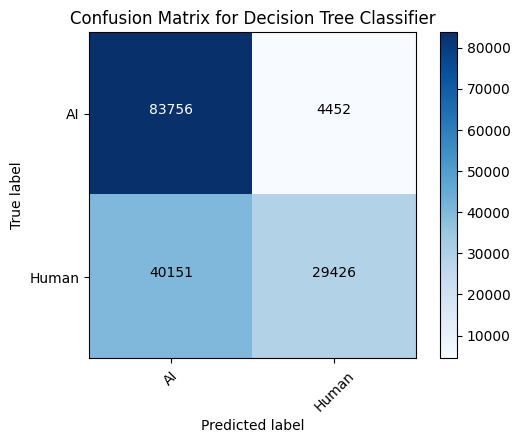

In [ ]:
from sklearn.metrics import confusion_matrix

for i, y_pred in enumerate(y_preds):
  conf_matrix = confusion_matrix(y_test, y_pred)

  plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
  plt.title(f'Confusion Matrix for {model_names[i]}')
  plt.colorbar()

  classes = ['AI', 'Human']
  plt.xticks([0, 1], classes, rotation=45)
  plt.yticks([0, 1], classes)

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.subplots_adjust(bottom=0.2)

  for i in range(2):
      for j in range(2):
          plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

  plt.show()
  print()

# Try it

In [ ]:
import re

def load_sentences(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Regular expression pattern to match lines starting with a number, a period, and a space
    pattern = r'^\d+\.\s'
    # Filter out lines that do not match the pattern
    sentences = [line.strip() for line in lines if re.match(pattern, line)]
    print(f"Number of sentences loaded: {len(sentences)}")
    return sentences

# Call the function with the file path
sentences = load_sentences("/content/drive/MyDrive/CSV/sentences.txt")


Number of sentences loaded: 20


In [ ]:
def test_models_on_sentences(pipelines, model_names, sentences, cls='Human'):
    total = 0
    correct_counts = {model_name: 0 for model_name in model_names}

    for sentence in sentences:
      # print(f"Sentence: {sentence}")
        for i, p in enumerate(pipelines):
            transformed_sentence = p.named_steps['tfidf'].transform([sentence])
            predicted_class = p.named_steps['clf'].predict(transformed_sentence)[0]
          # print(f"{model_names[i]} predicted: {predicted_class}")
            if predicted_class == cls:
                correct_counts[model_names[i]] += 1
        total += 1

    print("\nResults:")
    for model_name, correct_count in correct_counts.items():
      print(f"{model_name}: Correct predictions - {correct_count}/{total}")

    print(f"Total sentences tested: {total}")

test_models_on_sentences(pipelines, model_names, sentences) # default is Human


Results:
Multinomial Naive Bayes: Correct predictions - 12/20
Complement Naive Bayes: Correct predictions - 8/20
Decision Tree Classifier: Correct predictions - 19/20
Total sentences tested: 20
